<strong>Importing the libraries</strong>

In [55]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


<h1>Loading Dataset</h1>

In [56]:
data_set = tf.keras.datasets.mnist

(x_train,y_train) ,  (x_test,y_test) = data_set.load_data()


<h1>Scaling data</h1>

In [69]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


def learning_rate_schedule(epoch, lr):
    return lr * np.exp(-0.1)

<h1>Plotting Img Samples</h1>

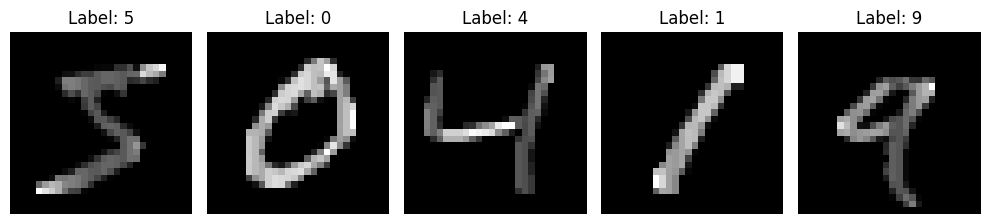

In [58]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Model Building</h1>

In [59]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [70]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)

In [80]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[lr_scheduler])


Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 3.6698e-04 - accuracy: 0.9999 - val_loss: 0.1416 - val_accuracy: 0.9787 - lr: 3.3287e-04
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5709e-04 - accuracy: 1.0000 - val_loss: 0.1528 - val_accuracy: 0.9769 - lr: 3.0119e-04
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6174e-04 - accuracy: 0.9999 - val_loss: 0.1416 - val_accuracy: 0.9786 - lr: 2.7253e-04
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 4.9887e-05 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9796 - lr: 2.4660e-04
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3479e-05 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9795 - lr: 2.2313e-04
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 7.7608e-06 - accuracy: 1.0000 - val_loss: 0.1449 - val_accuracy: 0.9800 - lr: 2.0190e-04
Epoch 7/25

<h1>Saving The Model</h1>

In [81]:
model.save('hand_digit.model')


<h1>Loading The Model</h1>

In [82]:
model = tf.keras.models.load_model('hand_digit.model')


<h1>Accuracy and Loss </h1>

In [83]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"loss = {loss} \naccuracy = {accuracy}")


313/313 [==============================] - 1s 2ms/step - loss: 0.1928 - accuracy: 0.9803
loss = 0.19278879463672638 
accuracy = 0.9803000092506409


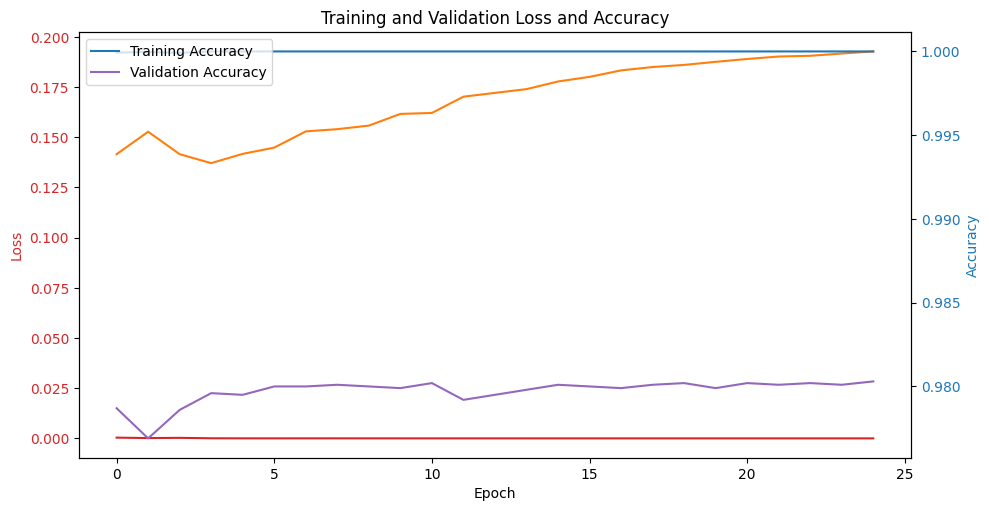

In [84]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(history.history['loss'], color='tab:red', label='Training Loss')
ax1.plot(history.history['val_loss'], color='tab:orange', label='Validation Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a separate y-axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(history.history['accuracy'], color='tab:blue', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='tab:purple', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Training and Validation Loss and Accuracy')
plt.legend(loc='upper left')
plt.show()

<h1>Plotting the learning Rate</h1>

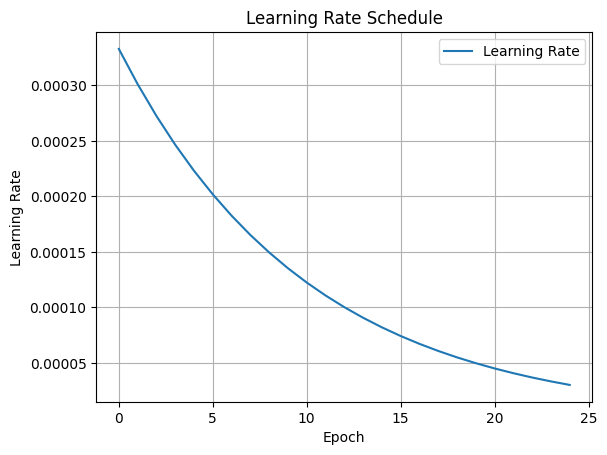

In [85]:
plt.plot(history.epoch, history.history['lr'], label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

<h1>Predicting the imgs</h1>

1/1 [==============================] - 0s 51ms/step
Predicted label: 7


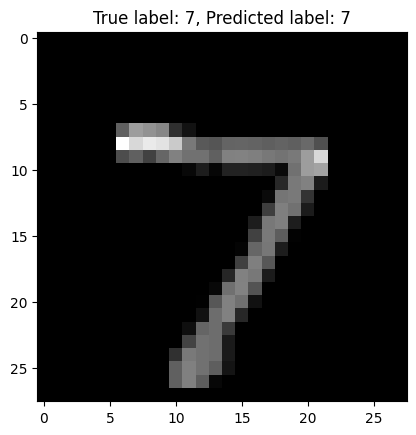

In [86]:
import numpy as np
# Load a single image for prediction

image_index = 0  # Change this to the index of the image you want to predict
input_image = x_test[image_index]

# Reshape the input image to match the model's input shape
input_image = np.reshape(input_image, (1, 28, 28))

# Make predictions
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)

print(f"Predicted label: {predicted_label}")

# Display the image and its label
plt.imshow(x_test[image_index], cmap='gray')
plt.title(f"True label: {y_test[image_index]}, Predicted label: {predicted_label}")
plt.show()


<h1> Prediction on more samples </h1>

1/1 [==============================] - 0s 16ms/step


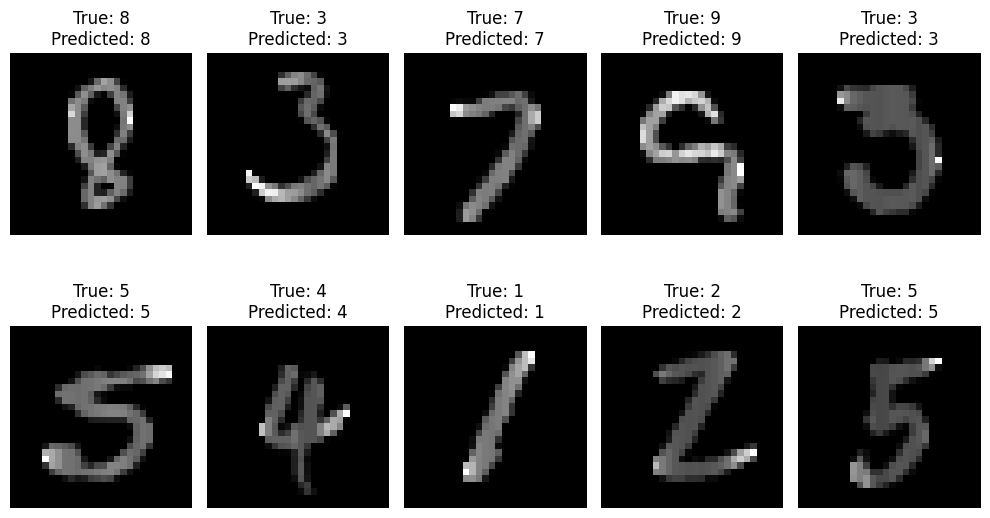

In [87]:
random_indices = np.random.randint(0, len(x_test), size=10)

plt.figure(figsize=(10, 6))

for i, image_index in enumerate(random_indices, start=1):
    input_image = x_test[image_index]
    input_image = np.reshape(input_image, (1, 28, 28))

    predictions = model.predict(input_image)
    predicted_label = np.argmax(predictions)

    plt.subplot(2, 5, i)
    plt.imshow(x_test[image_index], cmap='gray')
    plt.title(f"True: {y_test[image_index]}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()